<a href="https://colab.research.google.com/github/austinthope12/machine_learning/blob/development/Copy_of_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [4]:
print(x_train)

[[    37  79000]
 [    26  43000]
 [    48  33000]
 [    49  86000]
 [    34  25000]
 [    35 108000]
 [    38 113000]
 [    28  44000]
 [    39 106000]
 [    46  79000]
 [    57 122000]
 [    43 112000]
 [    53 143000]
 [    56 133000]
 [    33 113000]
 [    60  34000]
 [    40 142000]
 [    35  59000]
 [    54  26000]
 [    53  34000]
 [    40  65000]
 [    18  44000]
 [    45  22000]
 [    21  68000]
 [    30  49000]
 [    30  87000]
 [    26  86000]
 [    48 134000]
 [    41  79000]
 [    42  70000]
 [    57  60000]
 [    42 108000]
 [    39 122000]
 [    19  26000]
 [    58  47000]
 [    38  51000]
 [    27  90000]
 [    47  23000]
 [    48  96000]
 [    48 138000]
 [    47 144000]
 [    30  17000]
 [    35  50000]
 [    33  51000]
 [    25  33000]
 [    20  82000]
 [    46  59000]
 [    35  72000]
 [    47 113000]
 [    35  72000]
 [    34  43000]
 [    35  23000]
 [    52  21000]
 [    35  50000]
 [    37  55000]
 [    52 138000]
 [    36 118000]
 [    39  77000]
 [    57  2600

In [5]:
print(x_test)

[[    22  55000]
 [    41  72000]
 [    40 107000]
 [    50  88000]
 [    31  71000]
 [    42  65000]
 [    45 131000]
 [    26  32000]
 [    33 149000]
 [    50  36000]
 [    28  87000]
 [    37 146000]
 [    45  32000]
 [    41  72000]
 [    47  47000]
 [    42  53000]
 [    28  32000]
 [    35  71000]
 [    34 112000]
 [    45  45000]
 [    33  41000]
 [    40  71000]
 [    21  16000]
 [    25  80000]
 [    33  31000]
 [    27  84000]
 [    35  39000]
 [    40  61000]
 [    46  23000]
 [    48  90000]
 [    37 144000]
 [    59 130000]
 [    47  51000]
 [    49  36000]
 [    38  65000]
 [    47  34000]
 [    47  50000]
 [    42  54000]
 [    42  65000]
 [    18  68000]
 [    27  31000]
 [    31  34000]
 [    38  50000]
 [    39  59000]
 [    48  29000]
 [    46  96000]
 [    37  33000]
 [    60  83000]
 [    39  71000]
 [    23  63000]
 [    24  32000]
 [    49  28000]
 [    32 117000]
 [    24  55000]
 [    44  39000]
 [    40  78000]
 [    59 143000]
 [    46  88000]
 [    60  4600

## Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

In [7]:
print(x_train)

[[-0.04274753  0.26091827]
 [-1.09548521 -0.79329696]
 [ 1.00999015 -1.08613452]
 [ 1.10569358  0.46590456]
 [-0.32985781 -1.32040457]
 [-0.23415438  1.1101472 ]
 [ 0.0529559   1.25656598]
 [-0.90407836 -0.7640132 ]
 [ 0.14865932  1.05157969]
 [ 0.8185833   0.26091827]
 [ 1.87132098  1.52011979]
 [ 0.53147302  1.22728222]
 [ 1.48850728  2.13507867]
 [ 1.77561755  1.8422411 ]
 [-0.42556123  1.25656598]
 [ 2.15843126 -1.05685076]
 [ 0.24436275  2.10579491]
 [-0.23415438 -0.32475686]
 [ 1.5842107  -1.29112081]
 [ 1.48850728 -1.05685076]
 [ 0.24436275 -0.14905432]
 [-1.86111261 -0.7640132 ]
 [ 0.72287987 -1.40825584]
 [-1.57400234 -0.06120305]
 [-0.71267151 -0.61759442]
 [-0.71267151  0.49518832]
 [-1.09548521  0.46590456]
 [ 1.00999015  1.87152486]
 [ 0.34006617  0.26091827]
 [ 0.4357696  -0.00263554]
 [ 1.87132098 -0.2954731 ]
 [ 0.4357696   1.1101472 ]
 [ 0.14865932  1.52011979]
 [-1.76540919 -1.29112081]
 [ 1.96702441 -0.67616193]
 [ 0.0529559  -0.55902691]
 [-0.99978178  0.58303959]
 

In [8]:
print(x_test)

[[-1.54941129 -0.40594597]
 [ 0.2588697   0.09778261]
 [ 0.16369702  1.13487086]
 [ 1.11542385  0.57188009]
 [-0.69285714  0.06815151]
 [ 0.35404238 -0.10963504]
 [ 0.63956044  1.84601709]
 [-1.16872056 -1.08746111]
 [-0.50251177  2.37937676]
 [ 1.11542385 -0.96893674]
 [-0.97837519  0.542249  ]
 [-0.12182104  2.29048348]
 [ 0.63956044 -1.08746111]
 [ 0.2588697   0.09778261]
 [ 0.8299058  -0.64299472]
 [ 0.35404238 -0.46520816]
 [-0.97837519 -1.08746111]
 [-0.3121664   0.06815151]
 [-0.40733909  1.28302632]
 [ 0.63956044 -0.7022569 ]
 [-0.50251177 -0.82078127]
 [ 0.16369702  0.06815151]
 [-1.64458398 -1.5615586 ]
 [-1.26389324  0.33483135]
 [-0.50251177 -1.1170922 ]
 [-1.07354787  0.45335572]
 [-0.3121664  -0.88004346]
 [ 0.16369702 -0.22815942]
 [ 0.73473312 -1.35414095]
 [ 0.92507849  0.63114228]
 [-0.12182104  2.2312213 ]
 [ 1.97197801  1.816386  ]
 [ 0.8299058  -0.52447034]
 [ 1.02025117 -0.96893674]
 [-0.02664835 -0.10963504]
 [ 0.8299058  -1.02819892]
 [ 0.8299058  -0.55410144]
 

## Training the Logistic Regression model on the Training set

In [10]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(random_state=0)
regressor.fit(x_train, y_train)

LogisticRegression(random_state=0)

## Predicting a new result

In [11]:
print(regressor.predict(sc_x.transform([[30,87000]])))

[0]


## Predicting the Test set results

In [14]:
y_pred = regressor.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]]


## Making the Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[60  4]
 [13 23]]


0.83

## Visualising the Training set results

<ipython-input-20-f409e6a3567b>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


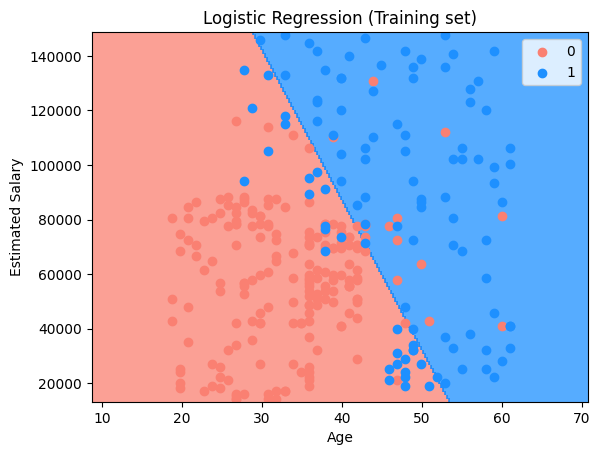

In [20]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc_x.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, regressor.predict(sc_x.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

<ipython-input-21-d96f90284e69>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


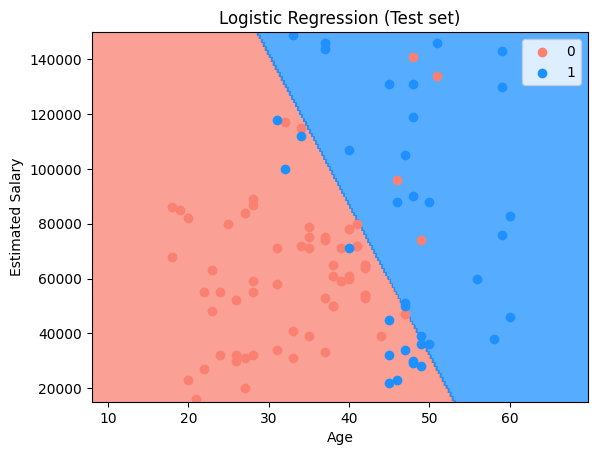

In [21]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc_x.inverse_transform(x_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, regressor.predict(sc_x.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()